In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import os

Data Path

In [10]:
curr_dir = os.getcwd()
raw_data_dir = 'Data'
raw_data_name = 'Customer Data.csv'
raw_data_path = os.path.join(curr_dir, raw_data_dir, raw_data_name)

print(curr_dir)
print(raw_data_path)

d:\FIBO\Bachelor\3rd_Year\1st_Semester\Machine_Learning_Project
d:\FIBO\Bachelor\3rd_Year\1st_Semester\Machine_Learning_Project\Data\Customer Data.csv


In [11]:
raw_data = pd.read_csv(raw_data_path)
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='Count'>

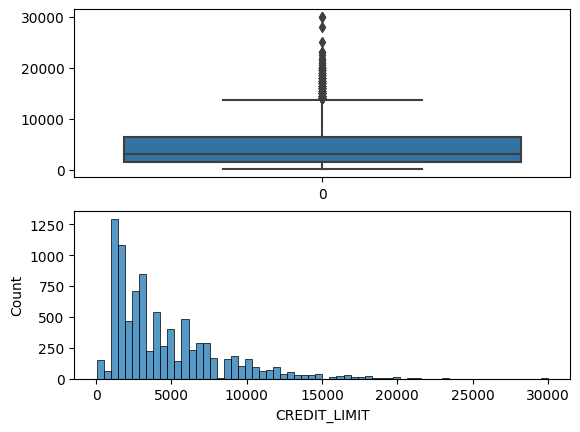

In [12]:
plt1 = plt.subplot(211)
sns.boxplot(raw_data['CREDIT_LIMIT'])
plt2 = plt.subplot(212)
sns.histplot(raw_data['CREDIT_LIMIT'])

<AxesSubplot: xlabel='PURCHASES', ylabel='Count'>

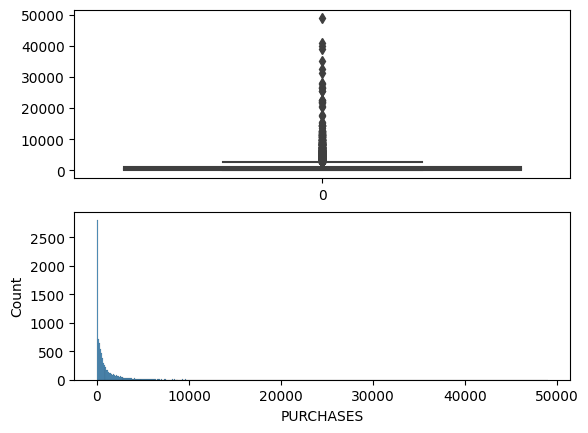

In [13]:
plt1 = plt.subplot(211)
sns.boxplot(raw_data['PURCHASES'])
plt2 = plt.subplot(212)
sns.histplot(raw_data['PURCHASES'])

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics

Function for Machine Learning Process

In [15]:
def k_means_n_cluster_tuner(data, k_cluster=9):
    Num_K = range(2, int(k_cluster)+1)
    silhouette_coef = []
    slope = []
    WCSS = []
    count = 0

    for k in Num_K:
        kmeans = KMeans(n_clusters=k, random_state=1,)
        model = kmeans.fit(data)
        WCSS.append(model.inertia_)
        labels = model.labels_
        silhouette_coef.append(metrics.silhouette_score(data, labels, metric='euclidean'))
        if (count > 1):
            slope.append(abs(model.inertia_ - last_WCSS))
        count += 1
        last_WCSS = model.inertia_
    diff = list(np.array(slope)/max(slope))
    med_sh_coef = np.median(np.array(silhouette_coef))
    mean_wcss = np.mean(np.array(diff))
    for i in diff:
        if ((i < mean_wcss) and (silhouette_coef[Num_K.index(diff.index(i) + 1)] >= med_sh_coef)):
            res = diff.index(i) + 1
            break

    return res, WCSS, silhouette_coef, list(Num_K)

In [16]:
def k_means_model_builder(data, k_cluster=9):
    kmeans = KMeans(n_clusters=k_cluster, random_state=1,)
    model = kmeans.fit(data)
    return model

In [17]:
def create_cluster(model, test, data):
    label = pd.DataFrame(model.predict(test), columns = ["cluster_class"])
    label.describe()
    ct_set = pd.concat([data, label], axis=1)
    return ct_set

In [18]:
def model_result_pairplot(data, label):
    sns.pairplot(data, hue=label)

In [19]:
def model_result_linepolar(data, label):
    plot = pd.melt(data, id_vars=[label])
    fig = px.line_polar(plot, r="value", theta="variable", color=label, line_close=True)
    fig.show()

In [95]:
column = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES"]
test = raw_data[column].copy()

In [96]:
test.isna().sum().sum()

0

In [97]:
test.dropna(inplace=True)
test = test.reindex()

In [98]:
std_test = test.copy()
# std_test = np.sqrt(test).copy()
std_test.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,978.871112,411.067645
std,2081.531879,2136.634782,2097.163877,904.338115
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,0.000000,0.000000
50%,873.385231,361.280000,0.000000,89.000000
75%,2054.140036,1110.130000,1113.821139,468.637500
max,19043.138560,49039.570000,47137.211760,22500.000000


In [99]:
best_n_cluster, wcss_score, sh_coef, k_list = k_means_n_cluster_tuner(std_test)

In [100]:
print(k_list)
print(wcss_score)
print(sh_coef)

[2, 3, 4, 5, 6, 7, 8, 9]
[87231679511.5457, 66066235662.770325, 55385344683.70251, 45784753119.36423, 39672278299.11073, 35134469632.38352, 31320195203.848812, 28451312197.533]
[0.6063063065213455, 0.6032758024976783, 0.5726832504590815, 0.543330723113595, 0.44495868767067287, 0.44909671442716065, 0.4502402023774543, 0.45217488967981667]


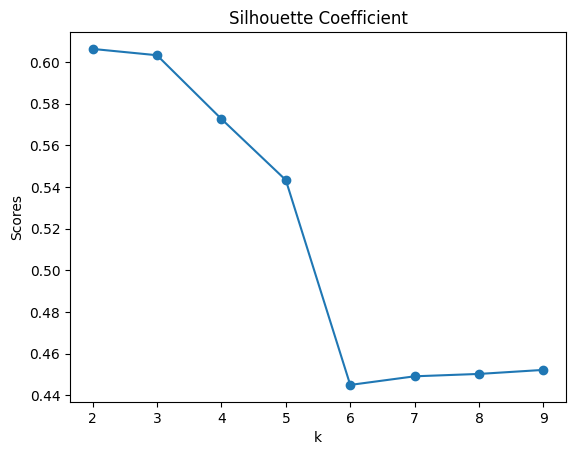

In [101]:
plt.scatter(k_list, sh_coef)
plt.plot(k_list, sh_coef)
plt.title('Silhouette Coefficient')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

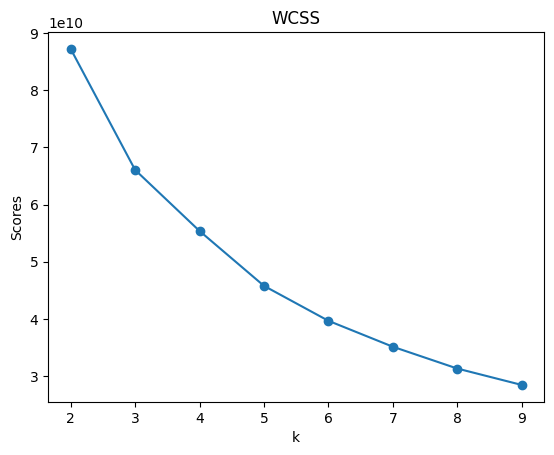

In [102]:
plt.scatter(k_list, wcss_score)
plt.plot(k_list, wcss_score)
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

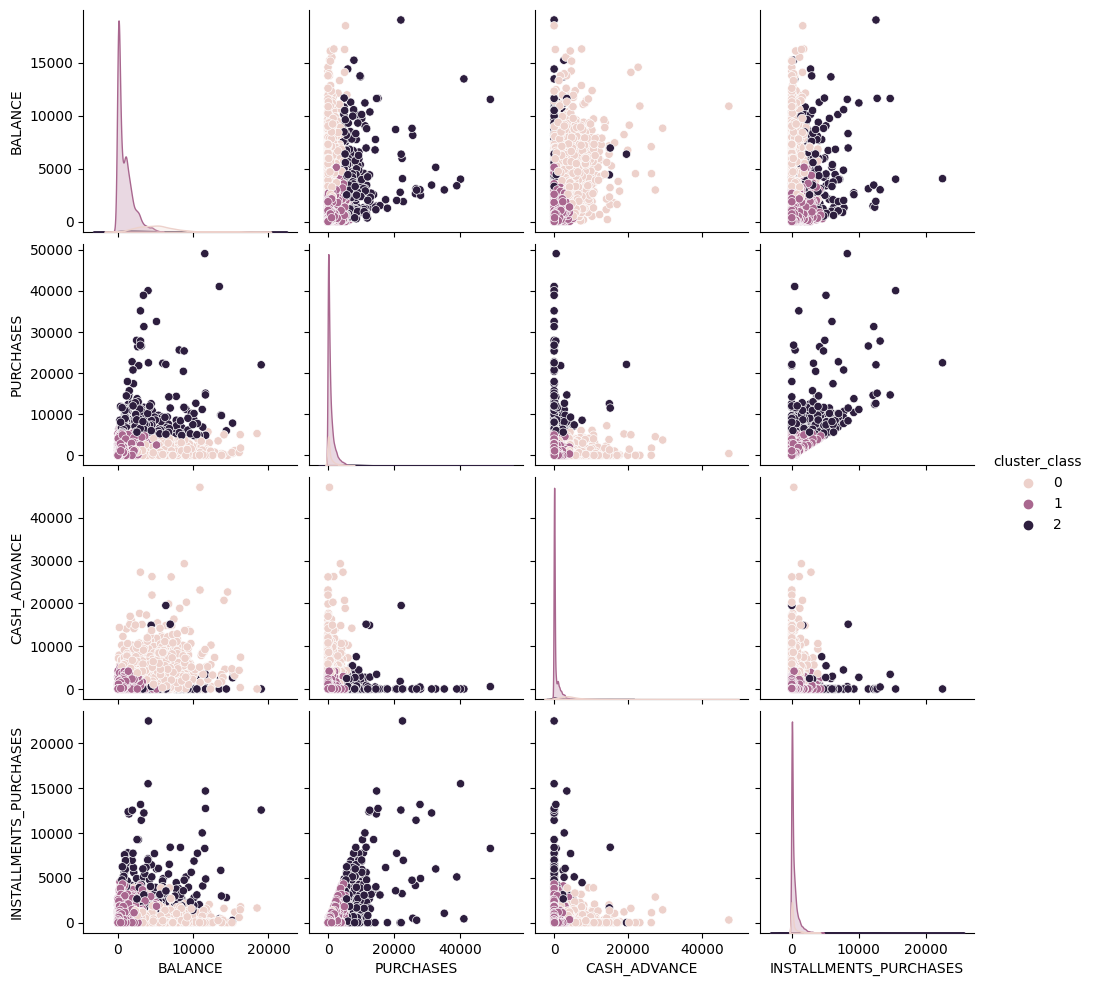

In [103]:
kmeans_model = k_means_model_builder(std_test, best_n_cluster)
test_cluster = create_cluster(kmeans_model, std_test, std_test)
model_result_pairplot(test_cluster, "cluster_class")

<AxesSubplot: xlabel='cluster_class', ylabel='BALANCE'>

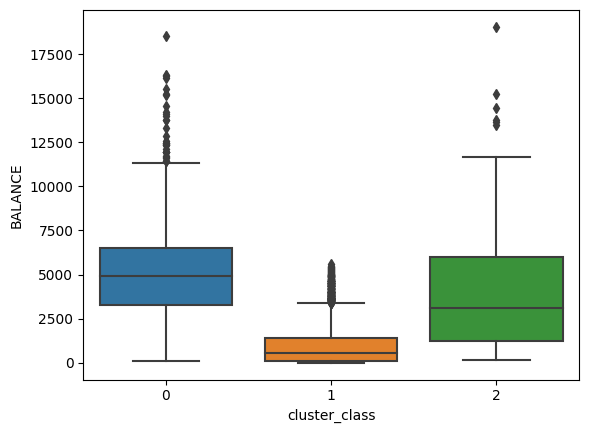

In [104]:
sns.boxplot(data=test_cluster, x='cluster_class', y='BALANCE')

<AxesSubplot: xlabel='cluster_class', ylabel='PURCHASES'>

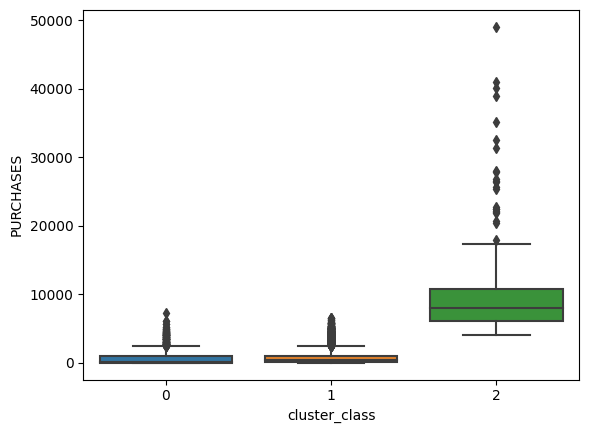

In [105]:
sns.boxplot(data=test_cluster, x='cluster_class', y='PURCHASES')

<AxesSubplot: xlabel='cluster_class', ylabel='CASH_ADVANCE'>

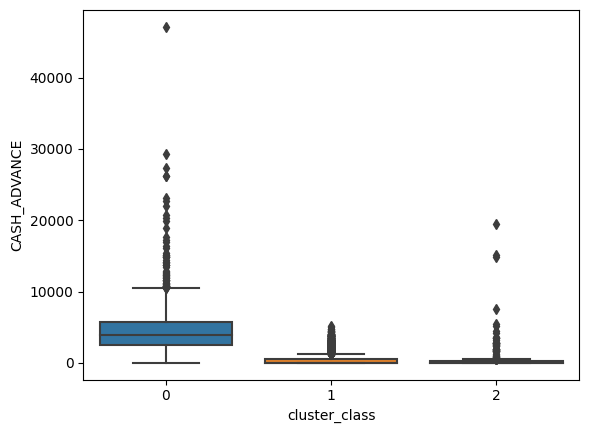

In [106]:
sns.boxplot(data=test_cluster, x='cluster_class', y='CASH_ADVANCE')

<AxesSubplot: xlabel='cluster_class', ylabel='INSTALLMENTS_PURCHASES'>

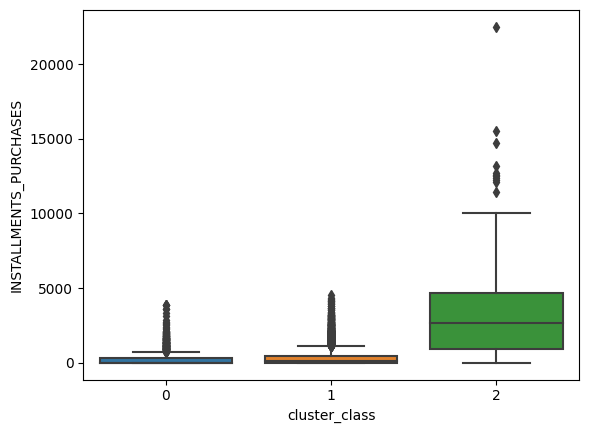

In [107]:
sns.boxplot(data=test_cluster, x='cluster_class', y='INSTALLMENTS_PURCHASES')

In [108]:
behavior_1_cluster = test_cluster[test_cluster["cluster_class"] == 0]
behavior_1_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.0
mean,5142.059713,705.293092,4609.522138,274.210826,0.0
std,2581.978916,1130.163977,3651.287780,547.324212,0.0
min,78.114579,0.000000,0.000000,0.000000,0.0
25%,3280.470343,0.000000,2528.397996,0.000000,0.0
50%,4936.913341,160.000000,3904.514452,0.000000,0.0
75%,6510.906764,974.270000,5714.812348,295.600000,0.0
max,18495.558550,7194.530000,47137.211760,3887.000000,0.0


In [109]:
behavior_2_cluster = test_cluster[test_cluster["cluster_class"] == 1]
behavior_2_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,7522.000000,7522.000000,7522.000000,7522.000000,7522.0
mean,916.283202,761.826553,415.959114,339.001812,1.0
std,1030.402956,1033.535778,767.262580,551.994216,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,85.413250,57.105000,0.000000,0.000000,1.0
50%,542.044001,360.980000,0.000000,98.200000,1.0
75%,1406.459447,1021.635000,479.811662,450.000000,1.0
max,5588.846272,6598.290000,5104.121726,4538.840000,1.0


In [110]:
behavior_3_cluster = test_cluster[test_cluster["cluster_class"] == 2]
behavior_3_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,cluster_class
count,241.000000,241.000000,241.000000,241.000000,241.0
mean,4174.865489,10004.319627,666.179352,3334.421328,2.0
std,3468.298526,6842.227785,2107.254845,3260.202806,0.0
min,150.952465,3999.920000,0.000000,0.000000,2.0
25%,1229.397644,6091.510000,0.000000,951.340000,2.0
50%,3123.339488,8040.780000,0.000000,2640.500000,2.0
75%,5970.705432,10755.680000,191.331735,4660.100000,2.0
max,19043.138560,49039.570000,19513.474830,22500.000000,2.0


In [111]:
cluster_centers = pd.concat([behavior_1_cluster.mean(), behavior_2_cluster.mean(), behavior_3_cluster.mean()], axis=1).T
model_result_linepolar(cluster_centers, 'cluster_class')

C:\Users\newth\AppData\Roaming\Python\Python39\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\newth\AppData\Roaming\Python\Python39\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\newth\AppData\Roaming\Python\Python39\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [93]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [37]:
column = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"]
test = raw_data[column].copy()

In [38]:
test.isna().sum().sum()

0

In [39]:
test.dropna(inplace=True)
test = test.reindex()

In [40]:
hirach_test = test.copy()
hirach_test.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,978.871112,411.067645,0.135144,0.364437
std,2081.531879,2136.634782,2097.163877,904.338115,0.200121,0.397448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000
50%,873.385231,361.280000,0.000000,89.000000,0.000000,0.166667
75%,2054.140036,1110.130000,1113.821139,468.637500,0.222222,0.750000
max,19043.138560,49039.570000,47137.211760,22500.000000,1.500000,1.000000


In [41]:
hirach_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hirach_net = hirach_model.fit(hirach_test)

In [42]:
print(hirach_net.distances_)

[5.42258107e-02 2.26423971e-01 2.54619661e-01 ... 1.57473785e+05
 2.05162260e+05 2.47662594e+05]


In [43]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

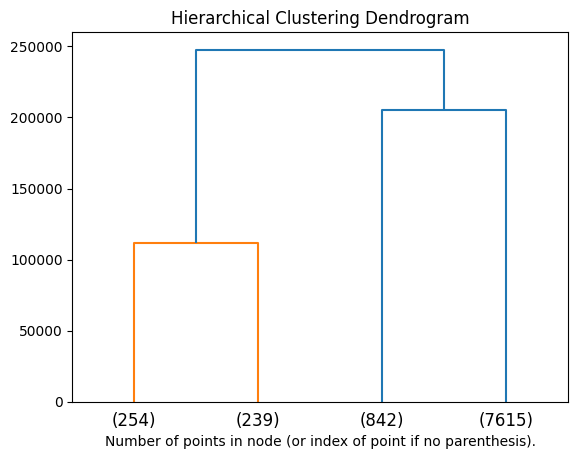

In [44]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hirach_net, truncate_mode="level", p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [45]:
hirach_model = AgglomerativeClustering(n_clusters=4)
hirach_class = pd.DataFrame(hirach_model.fit_predict(hirach_test), columns = ["cluster_class"])

In [46]:
hirach_class.value_counts()

cluster_class
3                5980
2                1635
0                 842
1                 493
dtype: int64

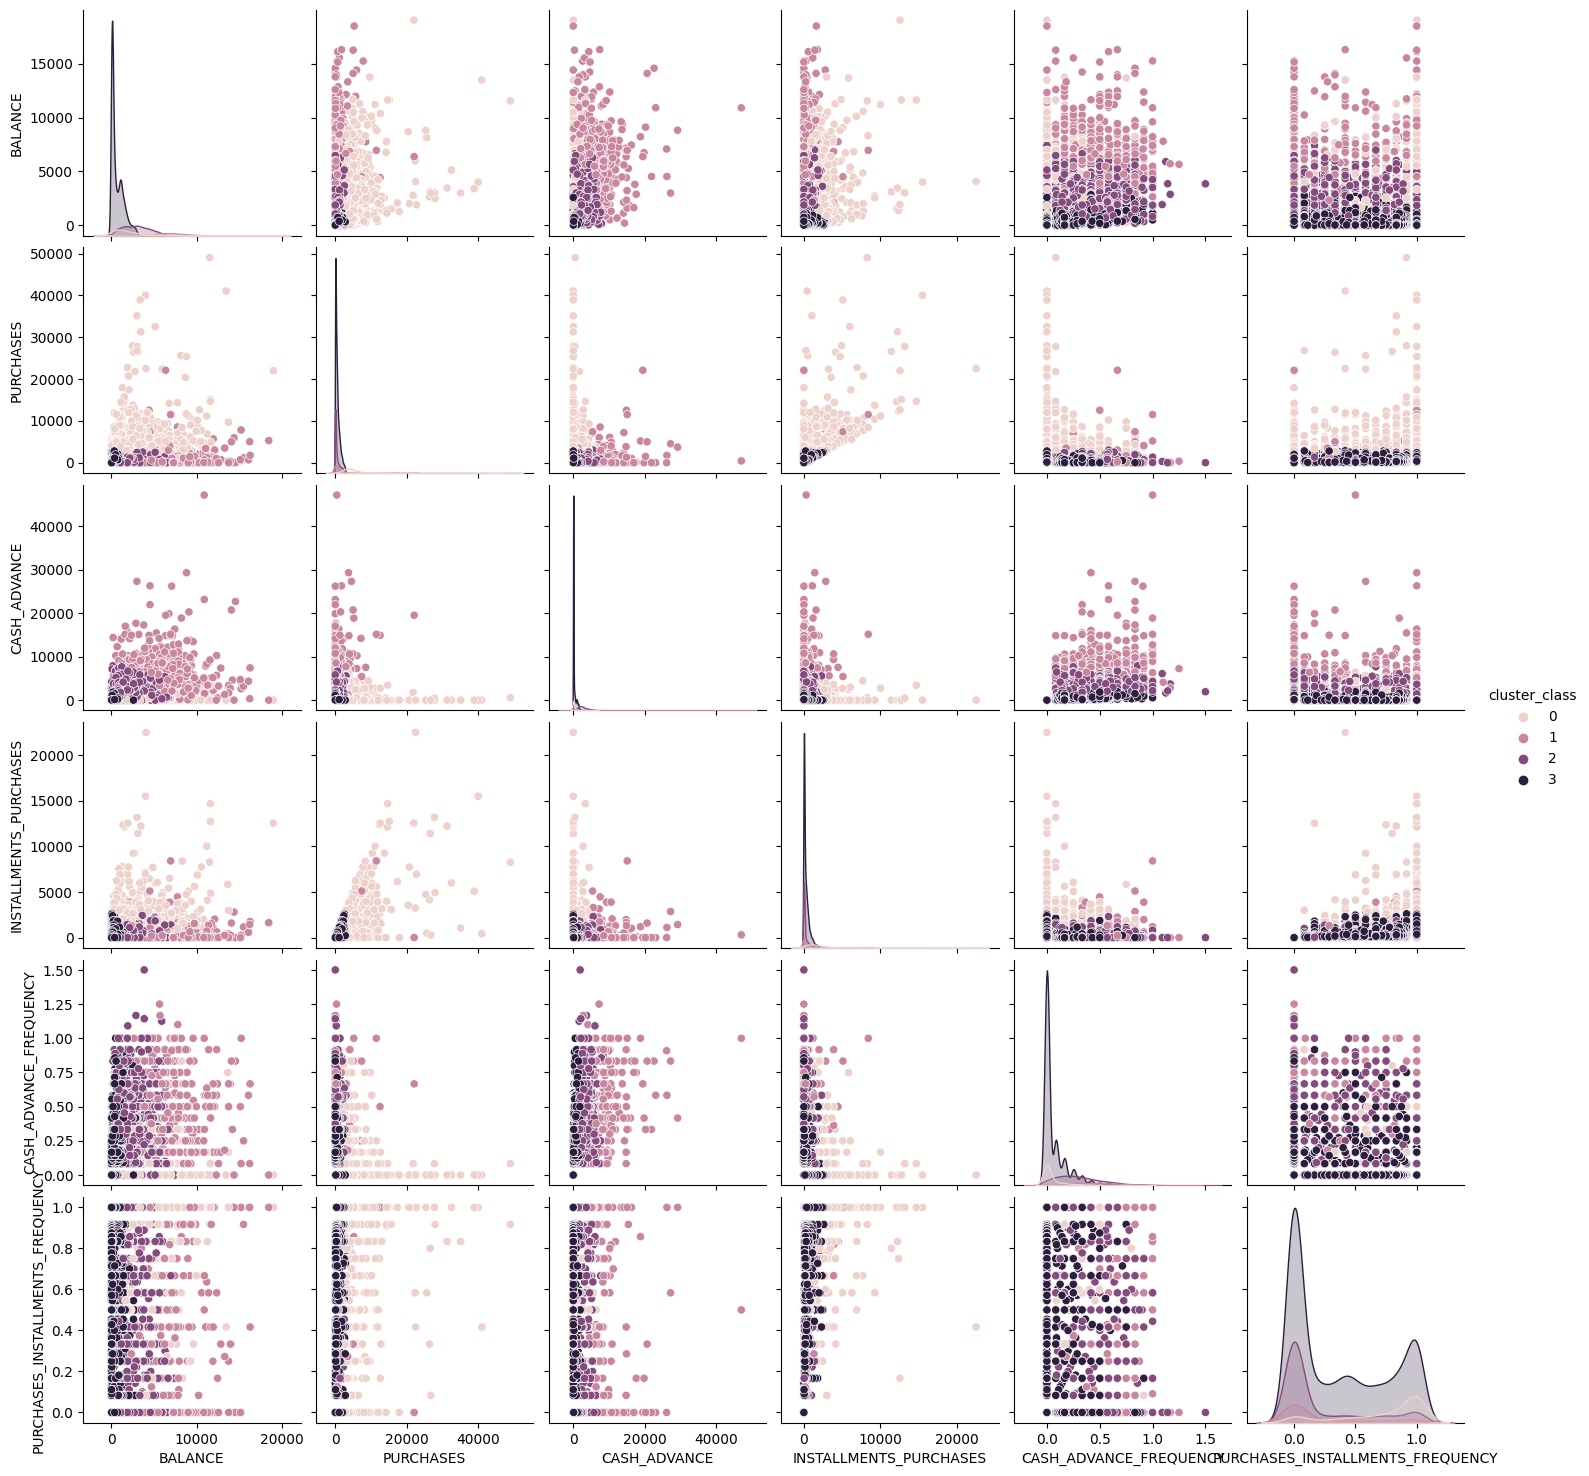

In [47]:
hirach_cluster = pd.concat([hirach_test, hirach_class], axis=1)
model_result_pairplot(hirach_cluster, "cluster_class")

In [48]:
behavior_1_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 0]
behavior_1_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.0
mean,2512.105631,5352.544418,438.805453,1860.290974,0.068802,0.722359,0.0
std,2608.186479,4698.112790,991.386358,2127.727417,0.144326,0.343494,0.0
min,12.659909,1000.550000,0.000000,0.000000,0.000000,0.000000,0.0
25%,593.264035,3114.837500,0.000000,597.367500,0.000000,0.500000,0.0
50%,1659.143789,4017.850000,0.000000,1331.630000,0.000000,0.916667,0.0
75%,3209.467395,5682.222500,220.338608,2383.017500,0.083333,1.000000,0.0
max,19043.138560,49039.570000,6419.421654,22500.000000,0.916667,1.000000,0.0


In [49]:
behavior_2_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 1]
behavior_2_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.0
mean,6884.005103,768.920142,6493.602317,282.688357,0.459057,0.226990,1.0
std,2725.653556,1756.655859,4785.663804,721.165825,0.251180,0.352175,0.0
min,198.035504,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5347.377116,0.000000,3215.576129,0.000000,0.250000,0.000000,1.0
50%,6732.823064,148.290000,5626.004046,0.000000,0.416667,0.000000,1.0
75%,8043.733112,793.100000,8530.648614,228.560000,0.666667,0.416667,1.0
max,18495.558550,22101.780000,47137.211760,8409.930000,1.250000,1.000000,1.0


In [50]:
behavior_3_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 2]
behavior_3_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.0
mean,2855.310515,483.583994,2390.690778,199.161168,0.307044,0.206308,2.0
std,1518.336097,718.865638,1615.827836,409.298114,0.222959,0.338308,0.0
min,8.640998,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1620.110625,0.000000,1293.166982,0.000000,0.166667,0.000000,2.0
50%,2784.030599,75.000000,2224.867516,0.000000,0.250000,0.000000,2.0
75%,3992.758315,749.785000,3382.765915,204.225000,0.416667,0.333333,2.0
max,7418.314012,3382.960000,8552.910316,2467.100000,1.500000,1.000000,2.0


In [51]:
behavior_4_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 3]
behavior_4_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.0
mean,639.566816,552.191204,214.263696,275.534540,0.070782,0.368607,3.0
std,718.219638,622.352694,409.758626,413.423823,0.129385,0.389740,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,54.684894,70.770000,0.000000,0.000000,0.000000,0.000000,3.0
50%,307.018382,332.770000,0.000000,99.930000,0.000000,0.250000,3.0
75%,1089.721495,822.937500,213.534254,396.312500,0.083333,0.750000,3.0
max,3298.236901,2984.340000,2101.740346,2863.920000,1.000000,1.000000,3.0


In [52]:
behavior_5_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 4]
behavior_5_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
behavior_6_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 5]
behavior_6_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
behavior_7_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 6]
behavior_7_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
behavior_8_hirach_cluster = hirach_cluster[hirach_cluster["cluster_class"] == 7]
behavior_8_hirach_cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,cluster_class
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN
